### `PREPARACIÓN DE LOS DATOS`

In [32]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargo el dataset Iris
iris = load_iris()
X = iris.data 

# Convierto a DataFrame para mejor visualización
iris_df = pd.DataFrame(X, columns=iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### `VERIFICANDO LA CANTIDAD DE CLASES DE MI DATASET`

In [33]:
print("Clases únicas:", np.unique(iris.target))

print("Número de muestras por clase:", np.bincount(iris.target))

print("Nombres de las clases en el dataset Iris:")
for i, nombre in enumerate(iris.target_names):
    print(f"Clase {i}: {nombre}")

Clases únicas: [0 1 2]
Número de muestras por clase: [50 50 50]
Nombres de las clases en el dataset Iris:
Clase 0: setosa
Clase 1: versicolor
Clase 2: virginica


### `APLICANDO K-MEANS`

In [34]:
# Aplico K-Means con 3 clusters (ya que sé que Iris tiene 3 clases)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Añadir las etiquetas de cluster al DataFrame
iris_df['Cluster'] = y_kmeans
print(iris_df.groupby('Cluster').mean())

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.853846          3.076923           5.715385   
1                 5.006000          3.428000           1.462000   
2                 5.883607          2.740984           4.388525   

         petal width (cm)  
Cluster                    
0                2.053846  
1                0.246000  
2                1.434426  


### `GRAFICACIÓN`

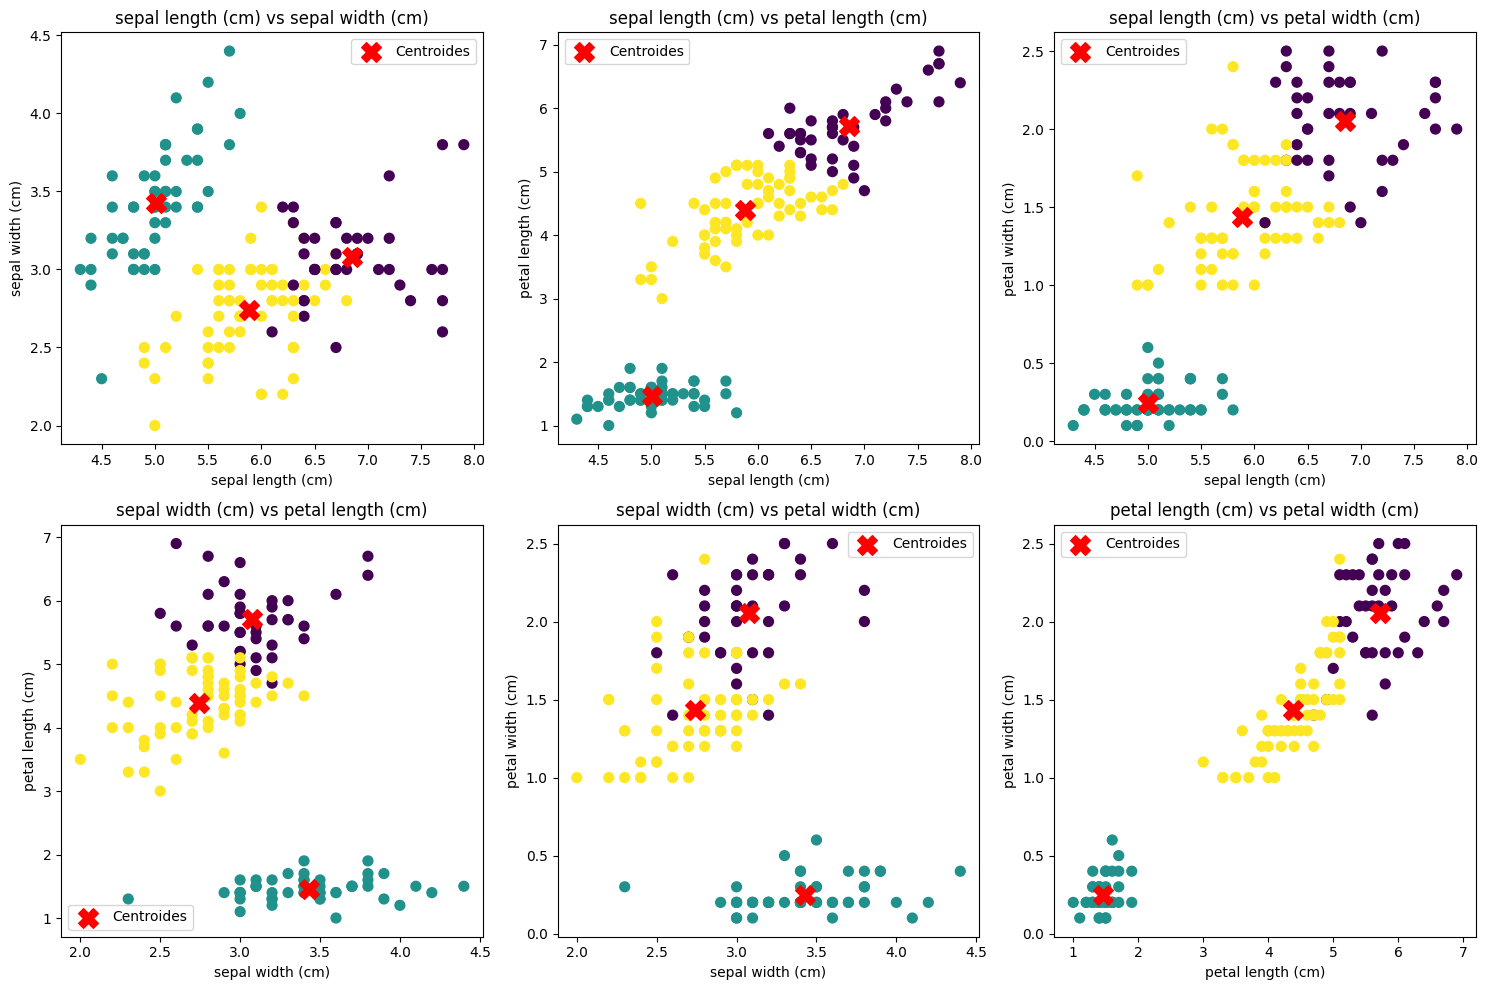

In [35]:
# Creao una figura con subplots para todas las combinaciones de características
plt.figure(figsize=(15, 10))

# Lista de todas las combinaciones posibles de características
combinaciones = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (feat1, feat2) in enumerate(combinaciones, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X[:, feat1], X[:, feat2], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, feat1], kmeans.cluster_centers_[:, feat2], 
                s=200, c='red', marker='X', label='Centroides')
    plt.xlabel(feature_names[feat1])
    plt.ylabel(feature_names[feat2])
    plt.title(f'{feature_names[feat1]} vs {feature_names[feat2]}')
    plt.legend()

plt.tight_layout()
plt.show()

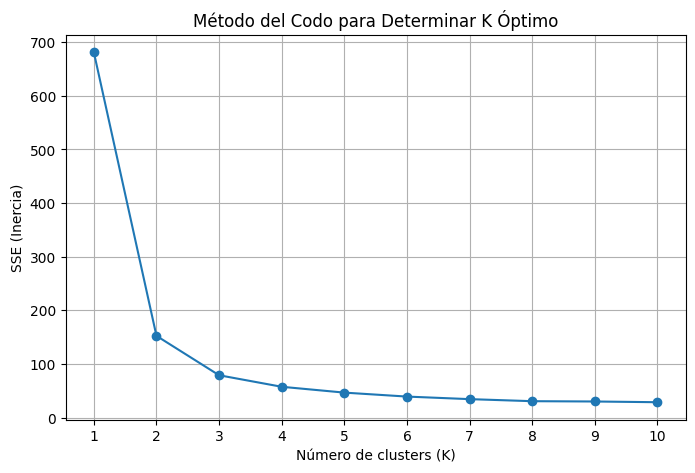

In [36]:
# Calculo SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

# Grafico el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

### `CONCLUSIONES`

- Se puede ver en las diferentes gráficas de clusters que son más distinguibles cuando se usan características del pétalo, es decir, petal length vs petal width, por lo que se puede interpretar que las medidas del pétalo son más influyentes para diferenciar las especies de iris.

- Donde aparece la característica del pétalo, los grupos aparecen bien definidos, con poca superposición o solapamiento.

- Entonces podemos entender que las características del sépalo no es suficiente para separar claramente las especies.

- Las gráficas muestran que no todas las características son igual de relevantes (los pétalos discriminan mejor que los sépalos)

- El método del codo validó que K=3 es una buena elecció, ya que la inercia (SSE) disminuye significativamente hasta k=3 y luego se estabiliza, lo cual coincide con la verificación de que hay tres especies.